<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [23]:
import piplite
await piplite.install('seaborn')

ModuleNotFoundError: No module named 'piplite'

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

C:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [ ]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

Import the file to a pandas dataframe.


In [ ]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface. While working on the downloaded version of this notebook on their local machines, the learners can simply **skip the steps above**, and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [2]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,0.0,0,Acer,4,2,1,5,14.0,0.5517241379310345,8,256,3.5280000000000005,978,Low,0,1
2,1.0,1,Dell,3,1,1,3,15.600000000000001,0.6896551724137931,4,256,4.851000000000001,634,Low,1,0
3,2.0,2,Dell,3,1,1,7,15.600000000000001,0.9310344827586208,8,256,4.851000000000001,946,Low,1,0
4,3.0,3,Dell,4,2,1,5,13.299999999999999,0.5517241379310345,8,128,2.6901,1244,Low,0,1


Print the first 5 entries of the dataset to confirm loading.


In [3]:
df.rename(columns=df.iloc[0], inplace=True)

In [4]:
df.drop(df.index[0], inplace=True, axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 1 to 238
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nan               238 non-null    float64
 1   Unnamed: 0        238 non-null    object 
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    object 
 4   GPU               238 non-null    object 
 5   OS                238 non-null    object 
 6   CPU_core          238 non-null    object 
 7   Screen_Size_inch  238 non-null    object 
 8   CPU_frequency     238 non-null    object 
 9   RAM_GB            238 non-null    object 
 10  Storage_GB_SSD    238 non-null    object 
 11  Weight_pounds     238 non-null    object 
 12  Price             238 non-null    object 
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    object 
 15  Screen-IPS_panel  238 non-null    object 
dtypes: float64(1), object(15)
memory usage: 29.9

In [24]:
def float_converter(df):
    for column in df.columns:
            if column not in ['NaN', 'Unnamed: 0', 'Manufacturer', 'Price-binned']:
                df[column] = df[column].astype('float')
    return df

In [25]:
float_converter(df)
df.dtypes

NaN                 float64
Unnamed: 0           object
Manufacturer         object
Category            float64
GPU                 float64
OS                  float64
CPU_core            float64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB              float64
Storage_GB_SSD      float64
Weight_pounds       float64
Price               float64
Price-binned         object
Screen-Full_HD      float64
Screen-IPS_panel    float64
dtype: object

In [26]:
df[['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']] = df[['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']].round(2)

In [27]:
df.head()

,NaN,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,0.0,0,Acer,4.0,2.0,1.0,5.0,14.0,0.55,8.0,256.0,3.53,978.0,Low,0.0,1.0
2,1.0,1,Dell,3.0,1.0,1.0,3.0,15.6,0.69,4.0,256.0,4.85,634.0,Low,1.0,0.0
3,2.0,2,Dell,3.0,1.0,1.0,7.0,15.6,0.93,8.0,256.0,4.85,946.0,Low,1.0,0.0
4,3.0,3,Dell,4.0,2.0,1.0,5.0,13.3,0.55,8.0,128.0,2.69,1244.0,Low,0.0,1.0
5,4.0,4,HP,4.0,2.0,1.0,7.0,15.6,0.62,8.0,256.0,4.21,837.0,Low,1.0,0.0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


<Axes: xlabel='CPU_frequency', ylabel='Price'>

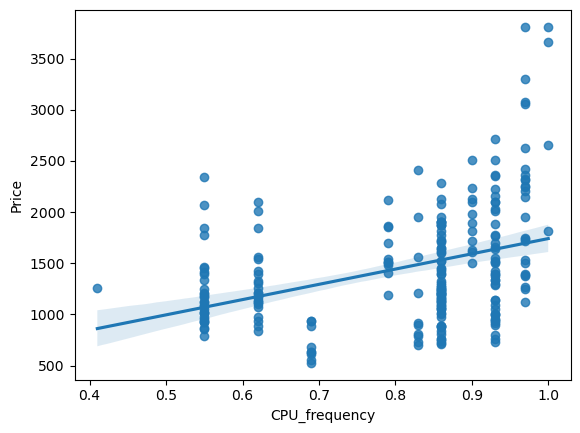

In [28]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
sns.regplot(data=df, x='CPU_frequency', y='Price')

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
```

</details>


(0.0, 3974.15)

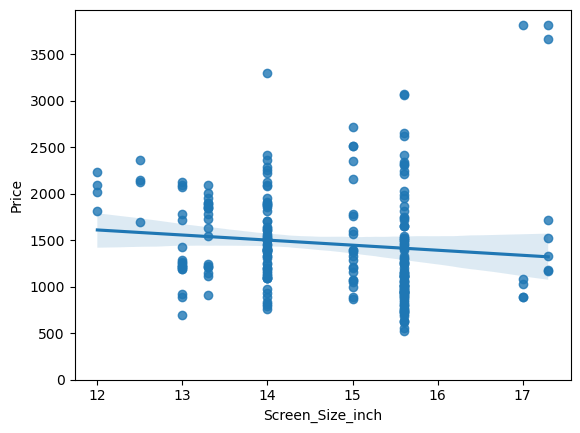

In [29]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(data=df, x='Screen_Size_inch', y='Price')
plt.ylim(0,)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
```

</details>


(0.0, 3974.15)

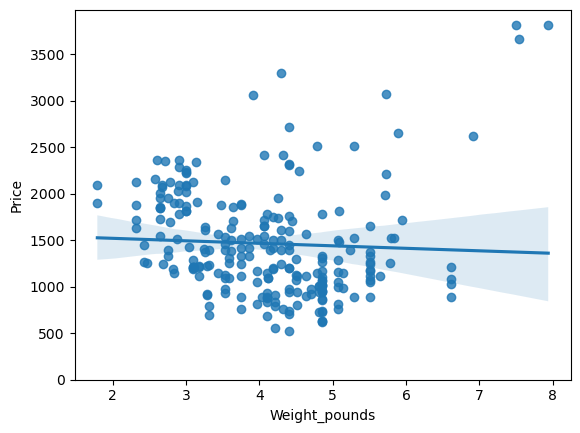

In [30]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
```

</details>


In [31]:
# Correlation values of the three attributes with Price
df[['Screen_Size_inch', 'Weight_pounds', 'CPU_frequency']].corr()

,Screen_Size_inch,Weight_pounds,CPU_frequency
Screen_Size_inch,1.000000,0.797463,0.000506
Weight_pounds,0.797463,1.000000,0.068162
CPU_frequency,0.000506,0.068162,1.000000


<details>
    <summary>Click here for Solution</summary>

```python
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())
```

</details>


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: xlabel='Category', ylabel='Price'>

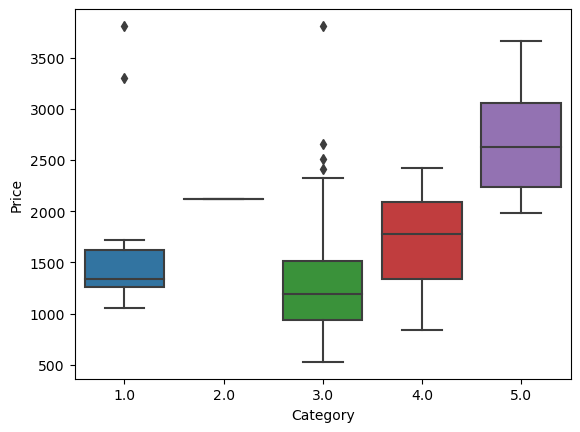

In [32]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


<Axes: xlabel='GPU', ylabel='Price'>

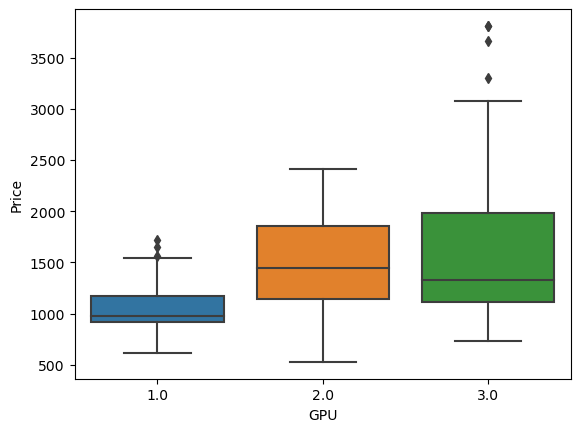

In [33]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


<Axes: xlabel='CPU_core', ylabel='Price'>

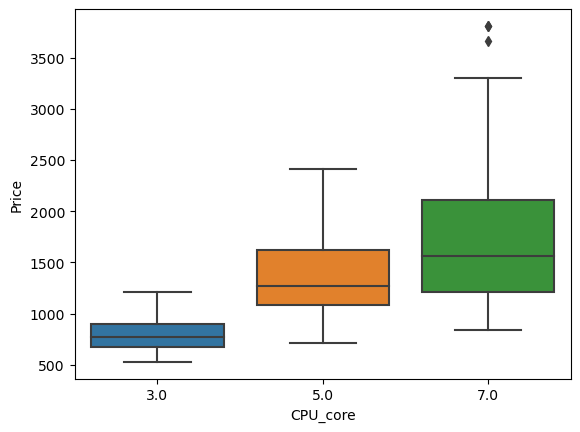

In [34]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(x="CPU_core", y="Price", data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


<Axes: xlabel='OS', ylabel='Price'>

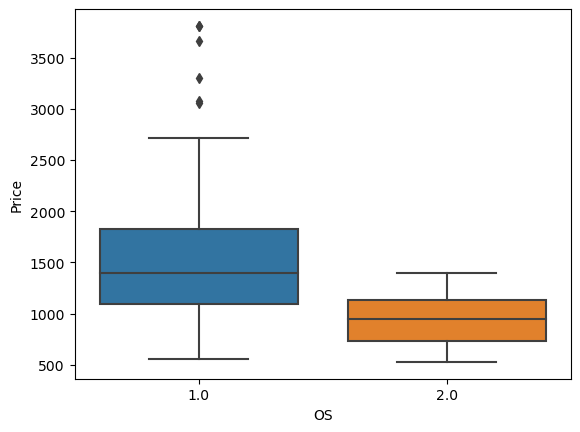

In [35]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot
sns.boxplot(x="OS", y="Price", data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


<Axes: xlabel='RAM_GB', ylabel='Price'>

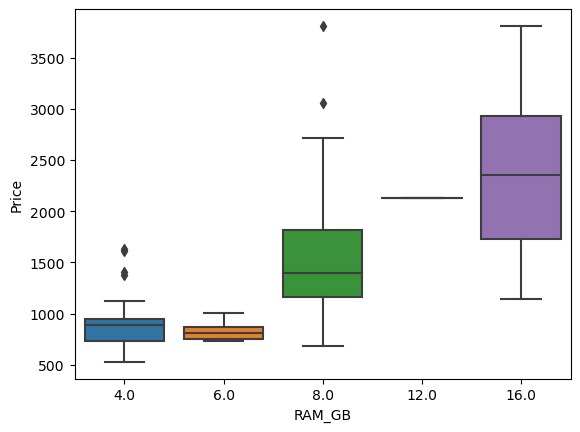

In [36]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

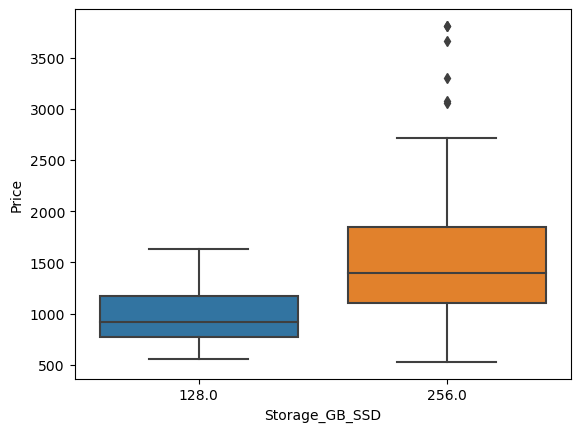

In [37]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [38]:
# Write your code below and press Shift+Enter to execute
df.describe(include=['object'])

,Unnamed: 0,Manufacturer,Price-binned
count,238,238,238
unique,238,11,3
top,0,Dell,Low
freq,1,71,160


<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [39]:
# Write your code below and press Shift+Enter to execute
# Create the group
pivot_table = df.groupby(['GPU', 'CPU_core'], as_index=False)['Price'].mean()
pivot_table

,GPU,CPU_core,Price
0,1.0,3.0,769.250000
1,1.0,5.0,998.500000
2,1.0,7.0,1167.941176
3,2.0,3.0,785.076923
4,2.0,5.0,1462.197674
5,2.0,7.0,1744.621622
6,3.0,3.0,784.000000
7,3.0,5.0,1220.680000
8,3.0,7.0,1945.097561


<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [40]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
df_group=df[['GPU', 'CPU_core', 'Price']]
df_group_pivot = df_group.pivot_table(index='GPU', columns='CPU_core', aggfunc='mean')
df_group_pivot

Price                          
CPU_core         3.0          5.0          7.0
GPU                                           
1.0       769.250000   998.500000  1167.941176
2.0       785.076923  1462.197674  1744.621622
3.0       784.000000  1220.680000  1945.097561

<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


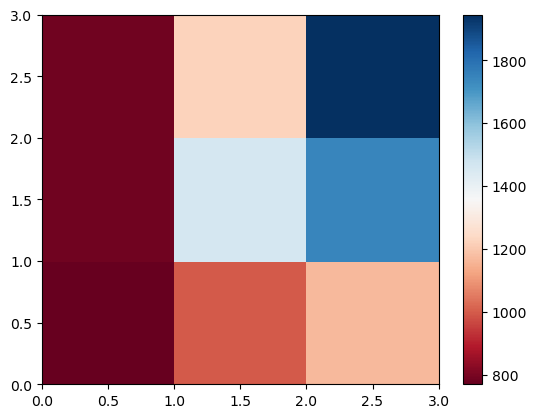

In [ ]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
plt.pcolor(df_group_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [ ]:
df_group['GPU'] = df_group['GPU'].astype('int')
df_group['CPU_core'] = df_group['CPU_core'].astype('int')

C:\Users\admin\AppData\Local\Temp\ipykernel_10992\1427408333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['GPU'] = df_group['GPU'].astype('int')
C:\Users\admin\AppData\Local\Temp\ipykernel_10992\1427408333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['CPU_core'] = df_group['CPU_core'].astype('int')


In [41]:
# Write your code below and press Shift+Enter to execute
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ", param, " is", pearson_coef, " with a P-value of P =", p_value)


RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.3700524243733643  with a P-value of P = 3.8800726795211155e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810294  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118265  with a P-value of P = 0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05037772414968536  with a P-value of P = 0.43917372781959163
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428  

<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
